Sistem rekomendasi produk, atau sering disebut recommender systems, kini sangat umum ditemui di berbagai situs. Sistem ini dapat memberikan rekomendasi produk yang relevan berdasarkan preferensi pengguna, dan bahkan sistem yang sederhana sekalipun bisa memberikan hasil yang sangat efektif. Pada proyek ini, kita akan membangun sebuah sistem rekomendasi tempat wisata menggunakan Python dan Pandas

**Load the packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_score, recall_score, average_precision_score

**Load the data**

In [2]:
# Load dataset
df = pd.read_csv('Tempat-Wisata-Toba-Preprocessing.csv')

In [3]:
# Examine the data
df.head()

,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,0,0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.126030e+20,5.0,NaN
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
2,2,2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.078860e+20,5.0,NaN
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k


In [4]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43226 entries, 0 to 43225
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        43226 non-null  int64  
 1   Unnamed: 0          43226 non-null  int64  
 2   address             43226 non-null  object 
 3   PlaceID             43226 non-null  int64  
 4   Nama_tempat_wisata  43226 non-null  object 
 5   Category            43226 non-null  object 
 6   ReviewerId          43225 non-null  float64
 7   Rating              43225 non-null  float64
 8   Reviews             22166 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.0+ MB


**Examine the most popular products**

membuat DataFrame yang lebih kecil, df_places, yang hanya berisi kolom-kolom yang berhubungan dengan nama tempat wisata, rating-nya, dan ulasannya, yang diekstrak dari DataFrame df yang lebih besar.
Ini memilih dan menyimpan data nama tempat wisata, rating, dan ulasan dari DataFrame df ke dalam DataFrame baru yang bernama df_places.

In [5]:
df_places = df[['Nama_tempat_wisata', 'Rating', 'Reviews']]

In [6]:
df_places.head()

,Nama_tempat_wisata,Rating,Reviews
0,PASIR PUTIH LUMBAN BULBUL,5.0,NaN
1,PASIR PUTIH LUMBAN BULBUL,5.0,bagus
2,PASIR PUTIH LUMBAN BULBUL,5.0,NaN
3,PASIR PUTIH LUMBAN BULBUL,5.0,sangat menyenagkan
4,PASIR PUTIH LUMBAN BULBUL,5.0,bebas foto dimana aja cuma 2k


Mengidentifikasi dan menampilkan 5 tempat wisata terpopuler berdasarkan jumlah ulasan yang mereka terima
- Mengelompokkan data tempat wisata berdasarkan nama (Nama_tempat_wisata) menggunakan groupby(), kemudian menghitung jumlah ulasan (reviews_count) dan rata-rata rating (avg_rating) untuk setiap tempat menggunakan agg(). Setelah itu, data diurutkan secara menurun berdasarkan jumlah ulasan (reviews_count) dengan sort_values() agar tempat wisata dengan ulasan terbanyak berada di urutan teratas, disimpan dalam DataFrame df_popularity.

In [7]:
# Group by 'Nama_tempat_wisata' to see the number of reviews and average rating
df_popularity = df_places.groupby('Nama_tempat_wisata').agg(
    reviews_count=('Reviews', 'count'),
    avg_rating=('Rating', 'mean')
).sort_values(by='reviews_count', ascending=False)

# Display top 5 most popular places based on the number of reviews
df_popularity.head(5)

,reviews_count,avg_rating
Nama_tempat_wisata,,
Pantai Lumban Bul-bul Balige,1361,4.320405
The Kaldera,915,4.520612
Bukit Holbung Samosir,851,4.685734
"Pantai Bebas Parapat, Danau Toba",819,4.531288
Danau Toba Parapat,794,4.732143


Mengidentifikasi dan menampilkan 5 tempat wisata terpopuler

In [8]:
# Group by 'Nama_tempat_wisata' to see the number of reviews and average rating
df_popularity = df_places.groupby('Nama_tempat_wisata').agg(
    reviews_count=('Reviews', 'count'),
    avg_rating=('Rating', 'mean')
).sort_values(by='reviews_count', ascending=False)

# Display top 10 most popular places based on the number of reviews
df_popularity.head(10)

,reviews_count,avg_rating
Nama_tempat_wisata,,
Pantai Lumban Bul-bul Balige,1361,4.320405
The Kaldera,915,4.520612
Bukit Holbung Samosir,851,4.685734
"Pantai Bebas Parapat, Danau Toba",819,4.531288
Danau Toba Parapat,794,4.732143
Pertunjukan Tari Sigale Gale,772,4.510405
Museum Batak Tb Silalahi Center,700,4.588571
Pantai Pasir Putih Parbaba,695,4.294286
Air Terjun Efrata,694,4.489644


**Create an item matrix**

Membuat matriks item, yaitu sebuah tabel yang merepresentasikan rating pengguna terhadap berbagai tempat wisata. Setiap baris pada tabel mewakili seorang pengguna (ReviewerId), dan setiap kolom mewakili sebuah tempat wisata (Nama_tempat_wisata). Nilai di dalam tabel menunjukkan rating yang diberikan oleh pengguna tersebut untuk tempat wisata yang bersangkutan. Jika seorang pengguna belum memberikan rating untuk suatu tempat, maka nilai tersebut diisi dengan 0. Matriks item ini merupakan dasar untuk membuat rekomendasi, karena dengan menganalisis polanya, sistem dapat mengidentifikasi tempat wisata yang mungkin disukai oleh pengguna berdasarkan rating mereka sebelumnya dan rating dari pengguna lain yang serupa.

In [9]:
# Create an item matrix: each column represents a place, and rows are reviewers
df_items = df.pivot_table(index='ReviewerId', columns='Nama_tempat_wisata', values='Rating').fillna(0)

In [10]:
df_items.head()

Nama_tempat_wisata,Aek Rangat Pangururan,Aek Sipangolu Bakkara,Air Terjun Efrata,Air Terjun Janji,Air Terjun Pandumaan,Air Terjun Sampuran,Air Terjun Siboruon,Air Terjun Situmurun,Air Terjun Taman Eden 100,Air Terjun Tombak Pangaribuan,...,Tarabunga,Tempat Pengasingan Soekarno,The Kaldera,Tombak Sulusulu,Tugu D.I PANJAITAN,Tugu Toga Aritonang,WF Coffee&Resto,Wisata Alam Ajibata,Wisata Bukit Gibeon,Wisata Rumah Pohon
ReviewerId,,,,,,,,,,,,,,,,,,,,,
1.000010e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000020e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000030e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000040e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000050e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Membagi dataset menjadi tiga bagian: data latih (70%), data validasi (15%), dan data uji (15%) menggunakan train_test_split. Tujuannya adalah untuk melatih model rekomendasi dengan data latih, menyesuaikannya dengan data validasi, dan menguji performanya dengan data uji yang belum pernah dilihat sebelumnya, guna memastikan model akurat dan tidak overfitting.

In [12]:
# Split the data into train, validation, and test sets (70% train, 15% validation, 15% test)
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

print("Jumlah data pada training set:", len(train_data))
print("Jumlah data pada validation set:", len(validation_data))
print("Jumlah data pada test set:", len(test_data))

Jumlah data pada training set: 30258
Jumlah data pada validation set: 6484
Jumlah data pada test set: 6484


**Create product recommendations**


Fungsi get_recommendations bertujuan merekomendasikan tempat wisata serupa berdasarkan pola rating pengguna menggunakan korelasi Pearson. Ia menghitung korelasi antara tempat wisata target dengan yang lain, mengurutkannya berdasarkan kemiripan, lalu mengembalikan daftar rekomendasi.

In [ ]:
# Define the helper function to get recommendations based on Pearson correlation
def get_recommendations(df_items, item):
    """Generate product recommendations based on similarity of items using Pearson correlation."""
    recommendations = df_items.corrwith(df_items[item])  # Calculate the Pearson correlation
    recommendations.dropna(inplace=True)  # Drop NaN values (places with no common reviewers with the given item)
    recommendations = pd.DataFrame(recommendations, columns=['correlation']).reset_index()
    recommendations = recommendations.sort_values(by='correlation', ascending=False)  # Sort by correlation
    return recommendations

Memprediksi rating pengguna untuk suatu item dengan memanfaatkan rating pengguna pada item serupa dan tingkat kesamaan antar item. Fungsi ini pertama-tama mengidentifikasi item serupa, lalu memeriksa rating pengguna terhadap item-item tersebut. Rating prediksi dihitung sebagai rata-rata tertimbang dari rating pengguna, dengan bobot berdasarkan tingkat kesamaan item. Jika pengguna belum memberikan rating pada item serupa, fungsi mengembalikan 0. Terakhir, fungsi membatasi rating prediksi agar berada dalam rentang 1 hingga 5.

In [ ]:
# Function to predict the rating based on weighted average similarity
def predict_rating(user_id, item, df_items, similarity_matrix):
    """Predict the rating of an item for a user using weighted average similarity."""
    # Find the similar items based on Pearson correlation
    similar_items = similarity_matrix[item]

    # Get the ratings given by the user for similar items
    user_ratings = df_items.loc[user_id, similar_items.index]

    # Filter out the items that the user has not rated
    rated_items = user_ratings[user_ratings > 0]

    if len(rated_items) == 0:
        return 0  # Return 0 if the user hasn't rated any similar item

    # Calculate the weighted average of ratings based on similarity scores
    weighted_ratings = rated_items * similar_items[rated_items.index]
    predicted_rating = weighted_ratings.sum() / similar_items[rated_items.index].sum()

    # Apply a threshold to avoid extreme predictions, keeping it within a reasonable rating range (e.g., 1 to 5)
    predicted_rating = np.clip(predicted_rating, 1, 5)

    return predicted_rating

Mendefinisikan fungsi evaluate_recommendations untuk mengevaluasi kinerja sistem rekomendasi tempat wisata. Fungsi ini menghitung metrik seperti RMSE dan MAE untuk mengukur akurasi prediksi rating, serta Precision, Recall, dan MAP untuk mengukur kualitas peringkat rekomendasi. Evaluasi dilakukan dengan membandingkan rekomendasi yang dihasilkan sistem dengan data uji (test_data). Hasil evaluasi berupa dictionary yang berisi nilai-nilai metrik tersebut, yang kemudian ditampilkan untuk rekomendasi Top 5 dan Top 10. Secara keseluruhan, kode ini bertujuan untuk mengukur seberapa baik sistem rekomendasi dalam memprediksi rating dan memberikan rekomendasi tempat wisata yang relevan.

In [ ]:
# Function to evaluate the recommendations using RMSE, MAE, Precision, Recall, MAP
def evaluate_recommendations(test_data, recommendations, df_items, similarity_matrix, top_n=10):
    """Evaluate the recommendation system using RMSE, MAE, Precision, Recall, MAP."""

    # Merge recommendations with the test data
    recommended_places = recommendations.head(top_n)['Nama_tempat_wisata'].values
    actual_places = test_data[test_data['Nama_tempat_wisata'].isin(recommended_places)]

    rmse_list = []
    mae_list = []

    for user_id in actual_places['ReviewerId'].unique():
        for place in recommended_places:
            # Predict rating for each user-place pair
            predicted_rating = predict_rating(user_id, place, df_items, similarity_matrix)

            # Actual rating for the place
            actual_rating = actual_places.loc[actual_places['ReviewerId'] == user_id, 'Rating'].values[0]

            # Append RMSE and MAE values for this prediction
            rmse_list.append((actual_rating - predicted_rating) ** 2)
            mae_list.append(abs(actual_rating - predicted_rating))

    # Calculate RMSE and MAE
    rmse = np.sqrt(np.mean(rmse_list))
    mae = np.mean(mae_list)

    # **Precision@N, Recall@N, MAP@N**: Use a threshold for positive reviews (rating > 3)
    y_true = actual_places['Rating'].apply(lambda x: 1 if x > 3 else 0)
    y_pred = np.array([1 if place in recommended_places else 0 for place in actual_places['Nama_tempat_wisata']])

    precision_at_n = precision_score(y_true, y_pred, zero_division=1)
    recall_at_n = recall_score(y_true, y_pred, zero_division=1)
    map_at_n = average_precision_score(y_true, y_pred)

    return {
        'RMSE': rmse,
        'MAE': mae,
        'Precision@{}'.format(top_n): precision_at_n,
        'Recall@{}'.format(top_n): recall_at_n,
        'MAP@{}'.format(top_n): map_at_n
    }

# Example: Get recommendations for a specific tourist attraction
target_place = 'Pantai Lumban Bul-bul Balige'
recommendations = get_recommendations(df_items, target_place)

# Calculate the similarity matrix
similarity_matrix = df_items.corr()

# Evaluate the recommendation system for Top 5 and Top 10
metrics_5 = evaluate_recommendations(test_data, recommendations, df_items, similarity_matrix, top_n=5)
metrics_10 = evaluate_recommendations(test_data, recommendations, df_items, similarity_matrix, top_n=10)

# Display the evaluation metrics
print('Evaluation Metrics (Top 5):', metrics_5)
print('Evaluation Metrics (Top 10):', metrics_10)

Evaluation Metrics (Top 5): {'RMSE': 0.5495879696428508, 'MAE': 0.25362319916211357, 'Precision@5': 0.8636363636363636, 'Recall@5': 1.0, 'MAP@5': 0.8636363636363636}
Evaluation Metrics (Top 10): {'RMSE': 0.5970039516333547, 'MAE': 0.28958435804552374, 'Precision@10': 0.8796296296296297, 'Recall@10': 1.0, 'MAP@10': 0.8796296296296297}


##Visualisasi Metrik##

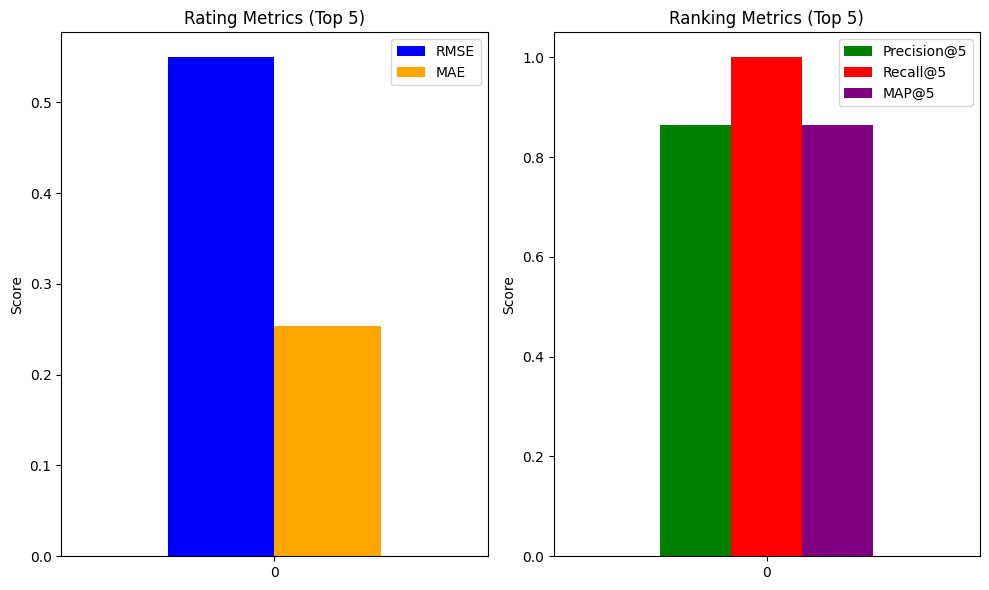

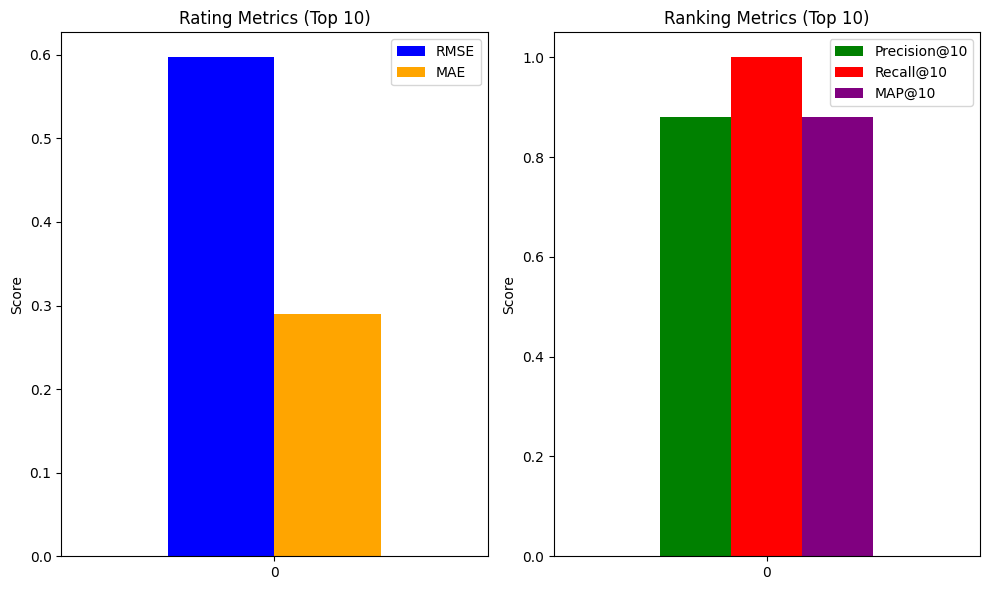

In [ ]:
# Create a DataFrame for better plotting
metrics_5_df = pd.DataFrame([metrics_5])
metrics_10_df = pd.DataFrame([metrics_10])

# Plot RMSE and MAE (Rating metrics)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
metrics_5_df[['RMSE', 'MAE']].plot(kind='bar', color=['blue', 'orange'], ax=plt.gca())
plt.title('Rating Metrics (Top 5)')
plt.ylabel('Score')
plt.xticks(rotation=0)

# Plot Precision, Recall, and MAP (Ranking metrics)
plt.subplot(1, 2, 2)
metrics_5_df[['Precision@5', 'Recall@5', 'MAP@5']].plot(kind='bar', color=['green', 'red', 'purple'], ax=plt.gca())
plt.title('Ranking Metrics (Top 5)')
plt.ylabel('Score')
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

# Plot RMSE and MAE (Rating metrics) for Top 10
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
metrics_10_df[['RMSE', 'MAE']].plot(kind='bar', color=['blue', 'orange'], ax=plt.gca())
plt.title('Rating Metrics (Top 10)')
plt.ylabel('Score')
plt.xticks(rotation=0)

# Plot Precision, Recall, and MAP (Ranking metrics) for Top 10
plt.subplot(1, 2, 2)
metrics_10_df[['Precision@10', 'Recall@10', 'MAP@10']].plot(kind='bar', color=['green', 'red', 'purple'], ax=plt.gca())
plt.title('Ranking Metrics (Top 10)')
plt.ylabel('Score')
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

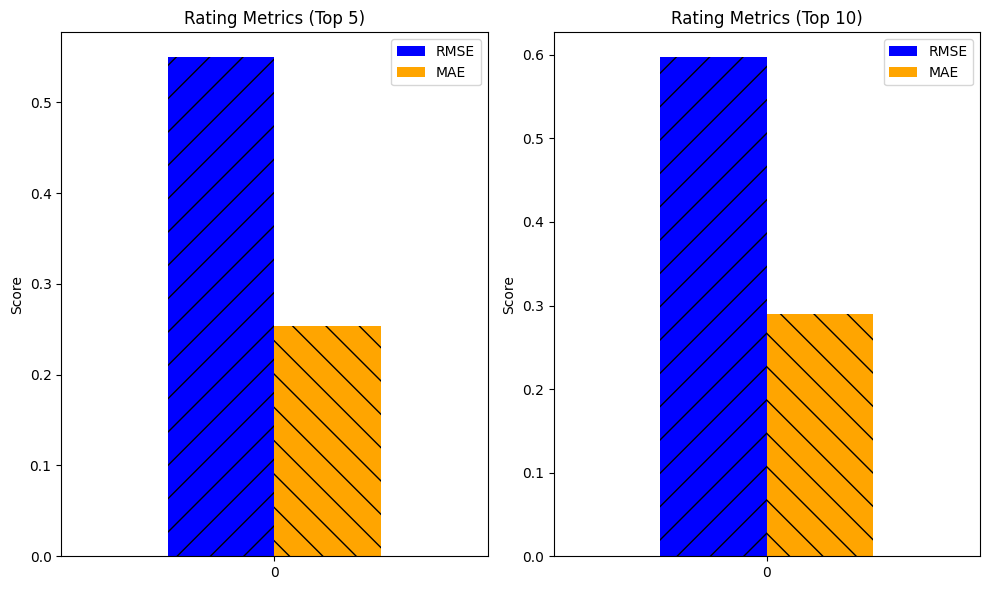

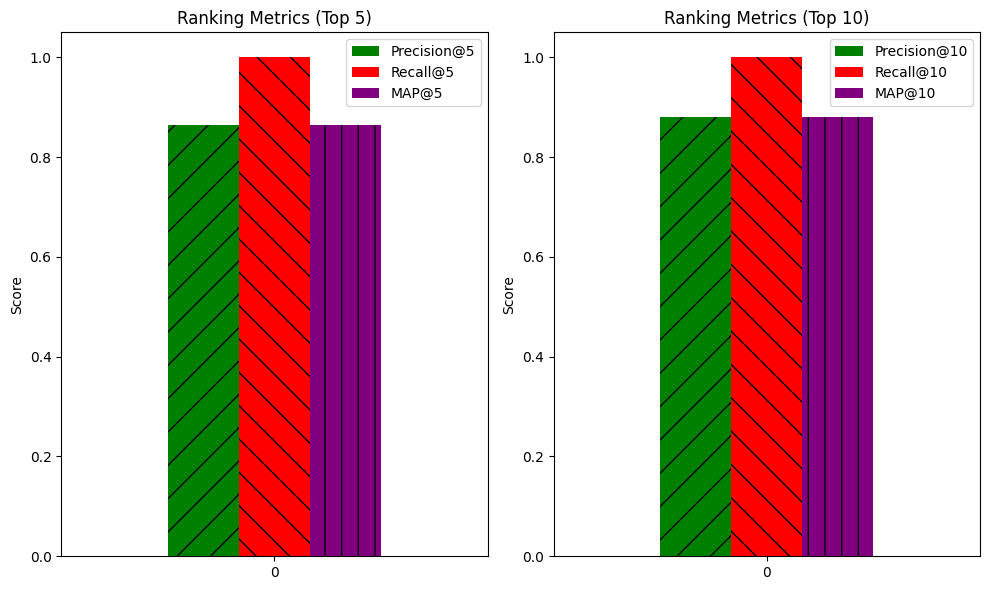

In [ ]:
# Fungsi untuk menambahkan pola pada grafik batang
def add_patterns_to_bar(ax, bars, patterns=['/', '\\', '|', '-', '+']):
    for i, bar in enumerate(bars):
        bar.set_hatch(patterns[i % len(patterns)])

# Plot RMSE dan MAE (Rating metrics)
plt.figure(figsize=(10, 6))

# Grafik untuk Top 5
plt.subplot(1, 2, 1)
bars_5 = metrics_5_df[['RMSE', 'MAE']].plot(kind='bar', color=['blue', 'orange'], ax=plt.gca())
add_patterns_to_bar(plt.gca(), bars_5.patches)  # Menambahkan pola pada grafik
plt.title('Rating Metrics (Top 5)')
plt.ylabel('Score')
plt.xticks(rotation=0)

# Grafik untuk Top 10
plt.subplot(1, 2, 2)
bars_10 = metrics_10_df[['RMSE', 'MAE']].plot(kind='bar', color=['blue', 'orange'], ax=plt.gca())
add_patterns_to_bar(plt.gca(), bars_10.patches)  # Menambahkan pola pada grafik
plt.title('Rating Metrics (Top 10)')
plt.ylabel('Score')
plt.xticks(rotation=0)

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Plot Precision, Recall, dan MAP (Ranking metrics)
plt.figure(figsize=(10, 6))

# Grafik untuk Top 5
plt.subplot(1, 2, 1)
bars_5 = metrics_5_df[['Precision@5', 'Recall@5', 'MAP@5']].plot(kind='bar', color=['green', 'red', 'purple'], ax=plt.gca())
add_patterns_to_bar(plt.gca(), bars_5.patches)  # Menambahkan pola pada grafik
plt.title('Ranking Metrics (Top 5)')
plt.ylabel('Score')
plt.xticks(rotation=0)

# Grafik untuk Top 10
plt.subplot(1, 2, 2)
bars_10 = metrics_10_df[['Precision@10', 'Recall@10', 'MAP@10']].plot(kind='bar', color=['green', 'red', 'purple'], ax=plt.gca())
add_patterns_to_bar(plt.gca(), bars_10.patches)  # Menambahkan pola pada grafik
plt.title('Ranking Metrics (Top 10)')
plt.ylabel('Score')
plt.xticks(rotation=0)

# Menampilkan grafik
plt.tight_layout()
plt.show()